In [ ]:
# Mount Google Drive (optional, to save models)
from google.colab import drive
drive.mount('/content/drive')

# Install YOLOv8
!pip install ultralytics

# Upload your dataset zip
from google.colab import files
uploaded = files.upload()   # Select your roboflow-exported ZIP

# Unzip dataset
import zipfile, os

zip_path = list(uploaded.keys())[0]
extract_dir = "/content/dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

os.listdir(extract_dir)


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.0 MB/s eta 0:00:00


Saving veggie detection.v1i.yolov8.zip to veggie detection.v1i.yolov8.zip


['data.yaml', 'README.roboflow.txt', 'train', 'README.dataset.txt']

In [ ]:
import os, random, shutil

images_dir = f"{extract_dir}/train/images"
labels_dir = f"{extract_dir}/train/labels"

val_split = 0.2  # 20% for validation
images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
random.shuffle(images)

val_count = int(len(images) * val_split)

os.makedirs(f"{extract_dir}/val/images", exist_ok=True)
os.makedirs(f"{extract_dir}/val/labels", exist_ok=True)

for img in images[:val_count]:
    shutil.move(os.path.join(images_dir, img), f"{extract_dir}/val/images/{img}")
    label = img.rsplit('.', 1)[0] + ".txt"
    if os.path.exists(os.path.join(labels_dir, label)):
        shutil.move(os.path.join(labels_dir, label), f"{extract_dir}/val/labels/{label}")


In [ ]:
from ultralytics import YOLO

# Load YOLOv8n model
model = YOLO("yolov8n.pt")

# Train
model.train(
    data=f"{extract_dir}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be266177bf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
img_path = "/content/dataset/valid/images/esp32_image_20250929_122705_jpg.rf.96bdeb6141f3f8a96f30c06b0f5d4af9.jpg"


image 1/1 /content/dataset/valid/images/esp32_image_20250929_122705_jpg.rf.96bdeb6141f3f8a96f30c06b0f5d4af9.jpg: 640x640 1 garlic, 8.3ms
Speed: 1.6ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


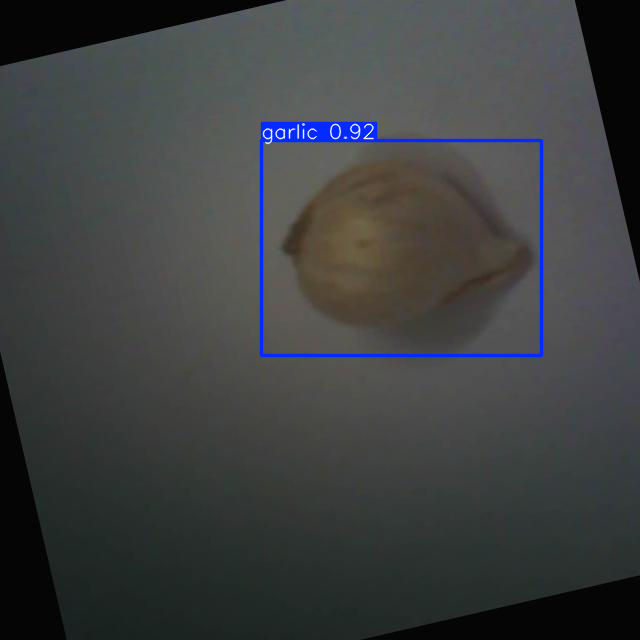

Detected garlic with 0.92 confidence


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the best trained model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Inference on a single image
results = model(img_path)

# Show results with bounding boxes
results[0].show()  # will display in Colab

# OR save results
results[0].save(filename="/content/result.jpg")

# Print predictions (class + confidence)
for r in results:
    for box in r.boxes:
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        print(f"Detected {model.names[cls_id]} with {conf:.2f} confidence")


In [ ]:
from google.colab import files
files.download("/content/runs/detect/train2/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
import cv2

# Load your trained model
model = YOLO("best.pt")

# Run prediction on an image
results = model.predict(source=img_path, conf=0.5, show=True)


image 1/1 /content/dataset/valid/images/esp32_image_20250929_122705_jpg.rf.96bdeb6141f3f8a96f30c06b0f5d4af9.jpg: 640x640 1 garlic, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
